# **Echo State Network (ESN)**

Echo State Networks (ESN) are a form of Reccurent neural network (RNN) where only the ouput layer is trained


Reccurent neural networks are designed to capture temporal dependencies in sequential data. Temporal dependencies describe how the impact of previous behavior will affect the current behavior.

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

**Below is a Echo State Network with Oscillator Neurons used to predict the function $y=e^x$**

In [34]:
class EchoStateNetwork:
  def __init__(self, reservoir_size, frequency = 0.1):
      self.reservoir_size = reservoir_size
      #input_weights, reservoir weights, -> randomly distributed from -0.5 to 0.5. These values don't change during training.
      #input -> reservoir connection
      self.input_weights = np.random.rand(reservoir_size, 1) - 0.5
      #internal reservoir connection
      self.res_weights = np.random.rand(reservoir_size, reservoir_size) - 0.5

      self.output_weights = None


      self.frequency = frequency

  def train(self, input_data, target_data):
    # Run reservoir with input data
    reservoir_states = self.run_reservoir(input_data)

		# Train the output weights using pseudo-inverse
    self.output_weights = np.dot(np.linalg.pinv(reservoir_states), target_data)

  def predict(self, input_data):
    # Run reservoir with input data
    reservoir_states = self.run_reservoir(input_data)

		# Make predictions using the trained output weights
    predictions = np.dot(reservoir_states, self.output_weights)

    return predictions

  def run_reservoir(self, input_data):
		# Initialize reservoir states
    #np.zeroes -> creates array of zeroes
    reservoir_states = np.zeros((len(input_data), self.reservoir_size))


		# Run the reservoir
    for t in range(1, len(input_data)):
      oscillatory_term = np.sin(2 * np.pi * self.frequency * t)
      #Calculates how neurons should behave given previous time ticks and current time tick
      #np.tanh -> squishes this data into the interval -1 to 1 to prevent exploding values
      reservoir_states[t, :] = np.tanh(np.dot(self.res_weights, reservoir_states[t - 1, :]) 
        + np.dot(self.input_weights, input_data[t]) + oscillatory_term)
    return reservoir_states

**Creating the Model**

In [35]:
time = np.arange(0, 10, 0.1)
input_data = 10 * np.random.rand(len(time))
#Generating the correct values of the data at each exponent
target_data = np.exp(time)
reservoir_size = 90 #higher value means more accuracy but also increased memory/runtime
echo_state = EchoStateNetwork(reservoir_size)

**Training the Model**

In [36]:
#Changes 1-d array into 2-d array with one term in each row to match the dimensions needed in echo_state
input_data_new = input_data[:, None]
target_data_new = target_data[:, None]

#train the model
echo_state.train(input_data_new, target_data_new)

#Creating test_input that we will test predictions on. Made the same as input_data for simplicity.
test_input = input_data[:, None]


In [37]:
predictions = echo_state.predict(test_input)

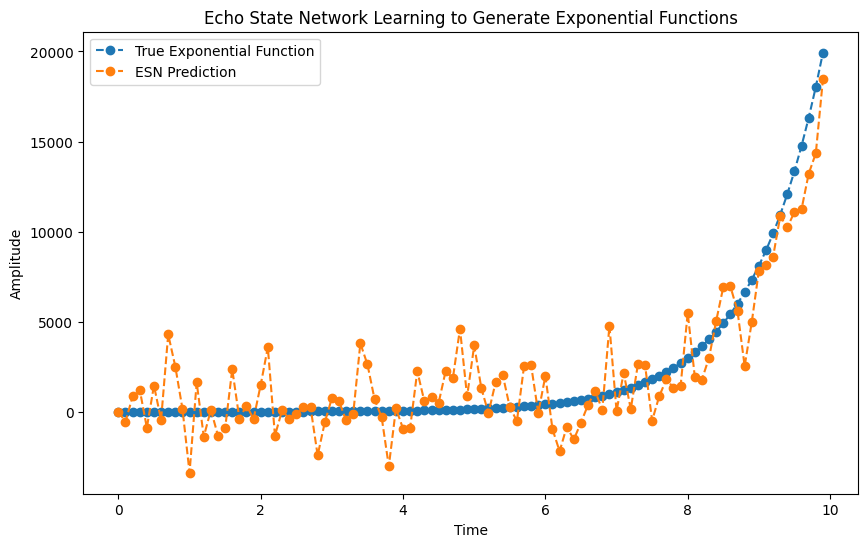

In [38]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, target_data, label='True Exponential Function',
		linestyle='--', marker='o')
plt.plot(time, predictions, label='ESN Prediction', linestyle='--', marker='o')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Echo State Network Learning to Generate Exponential Functions')
plt.show()

# **References**

ReLU Algorithm Explained: https://www.youtube.com/watch?v=68BZ5f7P94E

Reccurent Neural network Explained: https://www.youtube.com/watch?v=AsNTP8Kwu80

Echo State Networks Explained: https://www.youtube.com/watch?v=prXjoD9rEHo

Coupled Oscillators: https://brian2.readthedocs.io/en/stable/examples/coupled_oscillators.html


